In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

print("Dataset Loaded:")
print(df.head())

Dataset Loaded:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
label_candidates = ["label", "Label", "category", "Category", "class", "Class"]
message_candidates = ["message", "Message", "sms", "SMS", "text", "Text"]

label_col = None
message_col = None

for col in df.columns:
    if col in label_candidates:
        label_col = col
    if col in message_candidates:
        message_col = col

In [4]:
if label_col is None or message_col is None:
    label_col = df.columns[0]
    message_col = df.columns[1]

print(f"\nDetected label column: {label_col}")
print(f"Detected message column: {message_col}")



Detected label column: v1
Detected message column: v2


In [5]:
df = df[[label_col, message_col]].dropna()

In [6]:
df[label_col] = df[label_col].astype(str).str.lower().map({
    "ham": 0,
    "spam": 1
})

df = df.dropna()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df[message_col],
    df[label_col],
    test_size=0.25,
    random_state=42,
    stratify=df[label_col]
)


In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

In [9]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
nb_pred = nb.predict(X_test_vec)

In [10]:
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')
log_reg.fit(X_train_vec, y_train)
log_pred = log_reg.predict(X_test_vec)

In [11]:
svm = LinearSVC()
svm.fit(X_train_vec, y_train)
svm_pred = svm.predict(X_test_vec)

In [15]:
def evaluate(name, y_true, y_pred):
    print(f"\n======================= {name} =======================")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # ----- Plot confusion matrix -----
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HAM','SPAM'], yticklabels=['HAM','SPAM'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


======================= Naive Bayes =======================
Accuracy: 0.9691313711414213

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1206
           1       1.00      0.77      0.87       187

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Confusion Matrix:
[[1206    0]
 [  43  144]]


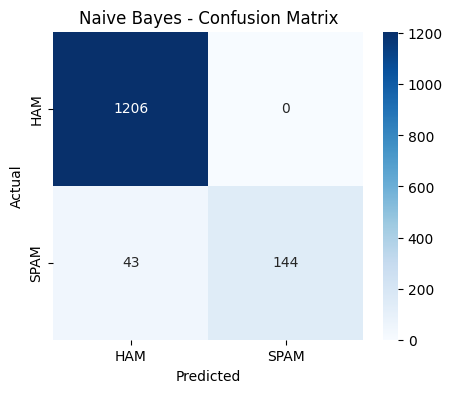


======================= Logistic Regression =======================
Accuracy: 0.9842067480258435

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1206
           1       0.96      0.93      0.94       187

    accuracy                           0.98      1393
   macro avg       0.97      0.96      0.97      1393
weighted avg       0.98      0.98      0.98      1393

Confusion Matrix:
[[1198    8]
 [  14  173]]


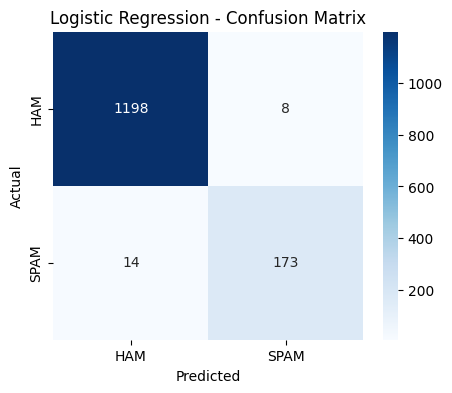


======================= Linear SVM =======================
Accuracy: 0.9856424982053122

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1206
           1       0.99      0.90      0.94       187

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393

Confusion Matrix:
[[1205    1]
 [  19  168]]


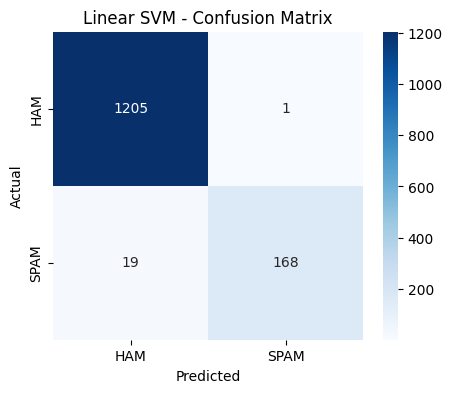

In [16]:
evaluate("Naive Bayes", y_test, nb_pred)
evaluate("Logistic Regression", y_test, log_pred)
evaluate("Linear SVM", y_test, svm_pred)

In [17]:
test_samples = [
    "Congratulations, you won a free iPhone! Click here.",
    "Hey mom, I'll be home at 7."
]

test_vec = vectorizer.transform(test_samples)
test_pred = svm.predict(test_vec)

print("\nCustom Predictions:")
for msg, pred in zip(test_samples, test_pred):
    print(f"{msg}  -->  {'SPAM' if pred == 1 else 'HAM'}")

print("\nDone!")


Custom Predictions:
Congratulations, you won a free iPhone! Click here.  -->  HAM
Hey mom, I'll be home at 7.  -->  HAM

Done!
